In [51]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from langdetect import detect
from scipy.stats import skewnorm, skew, norm
import seaborn as sns

In [2]:
file_path = '../data/helper_old/df_repos_metadata_star_no_range.json'
with open(file_path, 'r') as file:
    loaded_data = json.load(file)

df = pd.DataFrame(data=loaded_data)

In [ ]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "error"


df['language_spoken'] = df['description'].apply(detect_language)


In [7]:
df = df[df['language_spoken'] == 'en']

In [8]:
df.describe()

,id,size,stargazers_count,watchers_count,forks_count,open_issues_count,forks,open_issues,watchers,score
count,9.270000e+02,9.270000e+02,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.0
mean,2.769274e+08,1.394250e+05,22029.242718,22029.242718,3567.910464,403.576052,3567.910464,403.576052,22029.242718,1.0
std,2.803094e+08,5.280868e+05,31107.756147,31107.756147,6211.174519,1062.050097,6211.174519,1062.050097,31107.756147,0.0
min,2.655400e+04,7.000000e+00,7193.000000,7193.000000,108.000000,0.000000,108.000000,0.000000,7193.000000,1.0
25%,4.269177e+07,5.699000e+03,8905.500000,8905.500000,977.500000,61.000000,977.500000,61.000000,8905.500000,1.0
50%,1.518713e+08,2.406800e+04,12466.000000,12466.000000,1753.000000,147.000000,1753.000000,147.000000,12466.000000,1.0
75%,5.524411e+08,8.694150e+04,22189.000000,22189.000000,3401.000000,350.500000,3401.000000,350.500000,22189.000000,1.0
max,9.548733e+08,1.087097e+07,335520.000000,335520.000000,49242.000000,16073.000000,49242.000000,16073.000000,335520.000000,1.0


In [9]:
# estimation for number of bins
stars = df['stargazers_count'].unique().tolist()
num_of_stars = len(stars)
num_of_stars

879

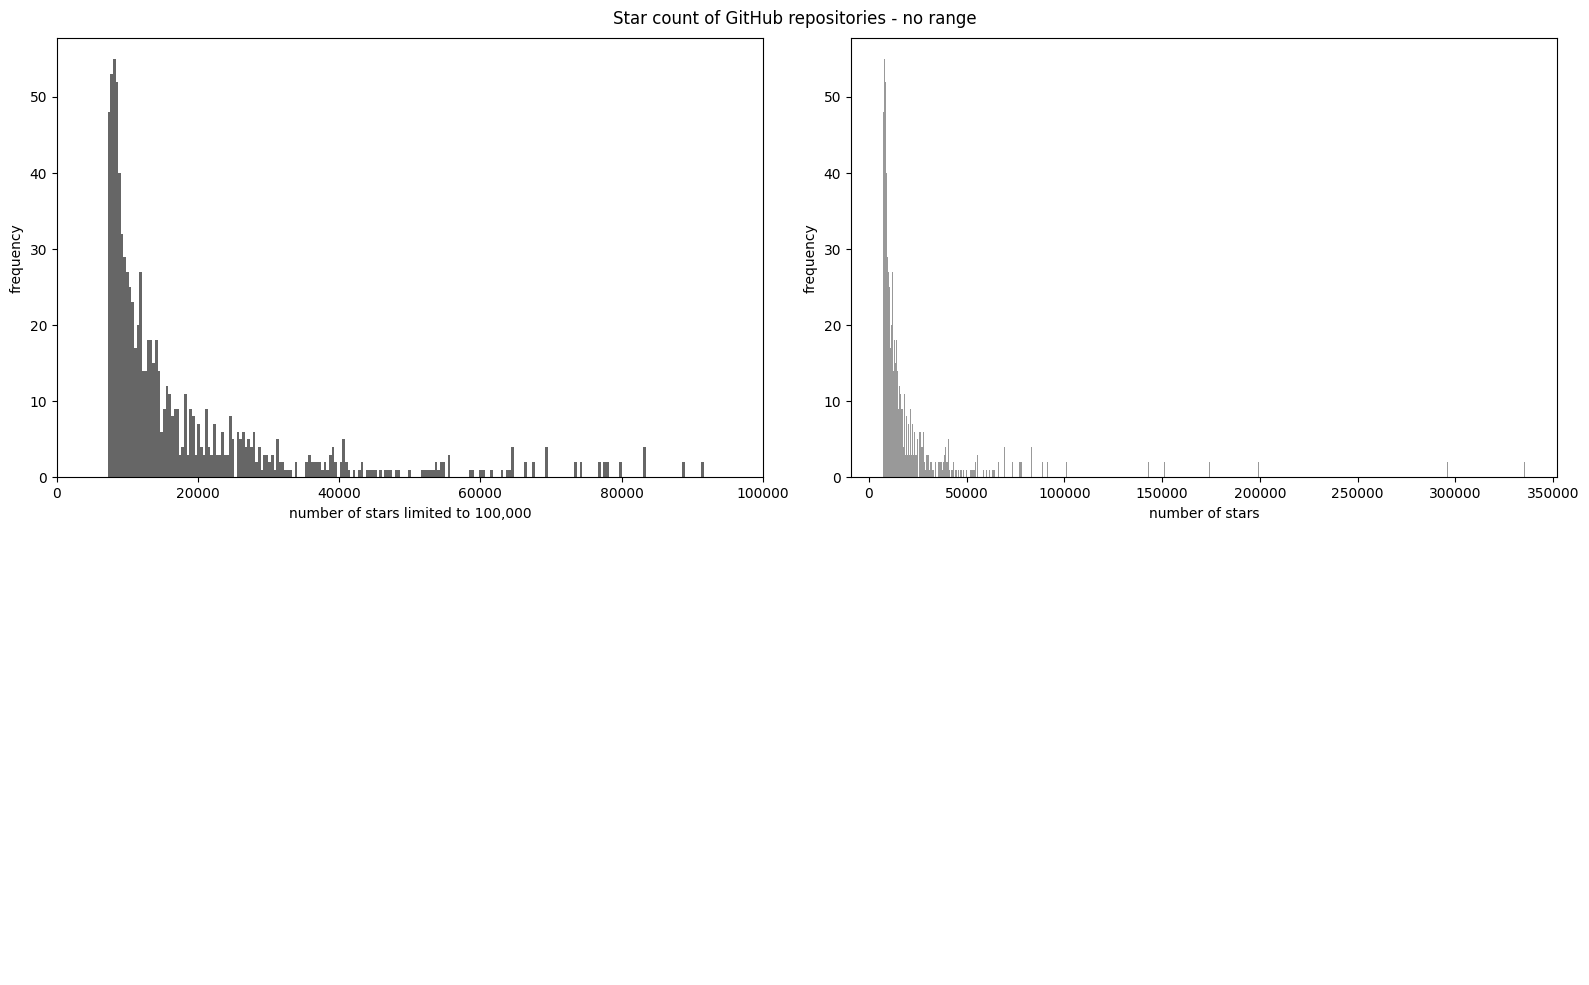

In [10]:
# number of stars
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10), sharex=False, sharey=False)
# sharex=True legt fest, ob Skala aller x-Achsen der Subplot gleich ist

# data
ax[0,0].hist(df['stargazers_count'], color='0.4', bins=num_of_stars)
ax[0,1].hist(df['stargazers_count'], color='0.6', bins=num_of_stars)
ax[1,1].axis('off') # plots anordnen
ax[1,0].axis('off')

# title
# ax[0,0].set_title('Stars count of GitHub repositorys - limited to 100,000')
# ax[0,1].set_title('Stars count of GitHub repositorys')

# lable axis x
ax[0,0].set_xlabel('number of stars limited to 100,000')
ax[0,1].set_xlabel('number of stars')

# lable axis y
ax[0,0].set_ylabel('frequency')
ax[0,1].set_ylabel('frequency')

# limitation axis
ax[0,0].set_xlim(0, 100000)

fig.suptitle('Star count of GitHub repositories - no range')
# format of interval between plots
plt.tight_layout()

plt.show()

### estimation of distribution

In [27]:
# parmeters for distribution
skewness = skew(df['stargazers_count'])
mean = df['stargazers_count'].mean()
std = df['stargazers_count'].std()
lower_bound = df['stargazers_count'].min()

# define distribution
shape = skewness
loc = mean
scale = std
skewed_dist = skewnorm(shape, loc, scale)

# sampels
samples = skewed_dist.rvs(size=10000)
truncated_samples = samples[samples >= lower_bound]


In [65]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters
mean = df['stargazers_count'].mean()
std_dev = df['stargazers_count'].std()
skewness = skew(df['stargazers_count'])
max_value = df['stargazers_count'].max()

# Fit the distribution (using a normal distribution here)
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 1000)
pdf = stats.skewnorm.pdf(x, loc=mean, scale=std_dev)

# Simulate truncation (right-side truncation)
truncated_x = x[x <= max_value]
truncated_pdf = pdf[x <= max_value]

# Interpolation/extrapolation
# Use the fitted PDF to estimate values
estimated_x = np.linspace(min(truncated_x), max(truncated_x), 1000)
estimated_pdf = stats.norm.pdf(estimated_x, loc=mean, scale=std_dev)

# Plot
plt.plot(x, pdf, label="Original Distribution")
plt.plot(truncated_x, truncated_pdf, label="Truncated Distribution")
plt.plot(estimated_x, estimated_pdf, label="Estimated (Extrapolated)")
plt.legend()
plt.show()



TypeError: _parse_args() missing 1 required positional argument: 'a'

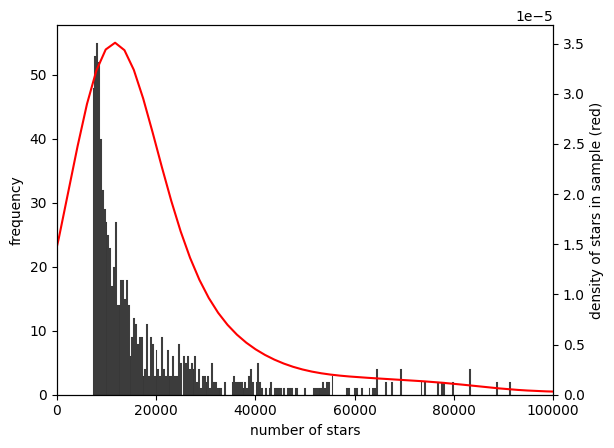

In [63]:
fig, ax1 = plt.subplots()
sns.histplot(df['stargazers_count'], bins=num_of_stars, color='black')
ax1.grid(visible=False)

ax2 = ax1.twinx()
sns.kdeplot(df['stargazers_count'], color='red')
ax2.grid(visible=False)
ax2.set_ylabel('density of stars in sample (red)')

plt.xlim(0, 100000)
ax1.set_ylabel('frequency')
ax1.set_xlabel('number of stars')
plt.show()

In [ ]:
fig, ax1 = plt.subplots()

# Plot the histogram
sns.histplot(df['stargazers_count'], bins=num_of_stars, color='black', ax=ax1)
ax1.grid(visible=False)

# Add a secondary y-axis and plot the KDE
ax2 = ax1.twinx()
sns.kdeplot(df['stargazers_count'], color='red', ax=ax2)
ax2.grid(visible=False)
ax2.set_ylabel('Density of stars in sample (red)')

# Add another line for the original distribution
original_mean, original_std_dev = 10, 2  # Replace with your actual values
x = np.linspace(0, 100000, 1000)  # Range of x values
original_distribution = stats.norm.pdf(x, original_mean, original_std_dev)
ax2.plot(x, original_distribution, label='Original Distribution', color='blue', lw=2)

# Set axis limits and labels
plt.xlim(0, 100000)
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Number of stars')

# Add legend
ax2.legend()

# Show the plot
plt.show()


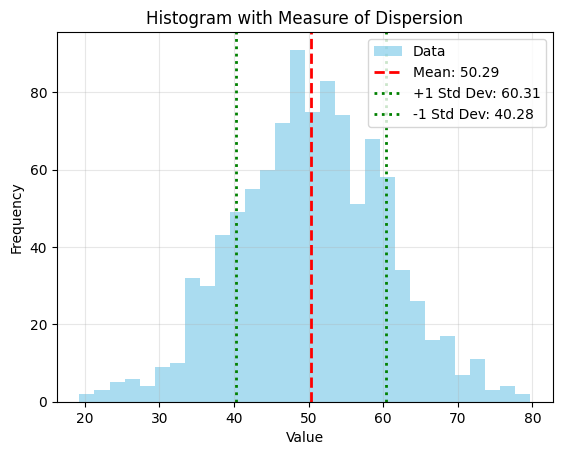

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
data = np.random.normal(loc=50, scale=10, size=1000)

# Calculate measures of dispersion
mean = np.mean(data)
std_dev = np.std(data)

# Plot histogram
plt.hist(data, bins=30, color='skyblue', alpha=0.7, label='Data')

# Add lines for mean and standard deviation
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(mean + std_dev, color='green', linestyle='dotted', linewidth=2, label=f'+1 Std Dev: {mean + std_dev:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dotted', linewidth=2, label=f'-1 Std Dev: {mean - std_dev:.2f}')

# Customize the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Measure of Dispersion')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [24]:
df.describe()


,id,size,stargazers_count,watchers_count,forks_count,open_issues_count,forks,open_issues,watchers,score
count,9.270000e+02,9.270000e+02,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.0
mean,2.769274e+08,1.394250e+05,22029.242718,22029.242718,3567.910464,403.576052,3567.910464,403.576052,22029.242718,1.0
std,2.803094e+08,5.280868e+05,31107.756147,31107.756147,6211.174519,1062.050097,6211.174519,1062.050097,31107.756147,0.0
min,2.655400e+04,7.000000e+00,7193.000000,7193.000000,108.000000,0.000000,108.000000,0.000000,7193.000000,1.0
25%,4.269177e+07,5.699000e+03,8905.500000,8905.500000,977.500000,61.000000,977.500000,61.000000,8905.500000,1.0
50%,1.518713e+08,2.406800e+04,12466.000000,12466.000000,1753.000000,147.000000,1753.000000,147.000000,12466.000000,1.0
75%,5.524411e+08,8.694150e+04,22189.000000,22189.000000,3401.000000,350.500000,3401.000000,350.500000,22189.000000,1.0
max,9.548733e+08,1.087097e+07,335520.000000,335520.000000,49242.000000,16073.000000,49242.000000,16073.000000,335520.000000,1.0
